<a href="https://colab.research.google.com/github/jferreiraz/ObjectIdentifier/blob/main/ObjectIdentifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pip install

In [ ]:
!pip install pyyaml==5.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [ ]:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html


Library import

In [ ]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

1.7.1+cu101
True


In [ ]:
import detectron2

from detectron2.utils.logger import setup_logger
setup_logger()

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.utils.visualizer import ColorMode, Visualizer

import os
import cv2
from google.colab.patches import cv2_imshow

Image test

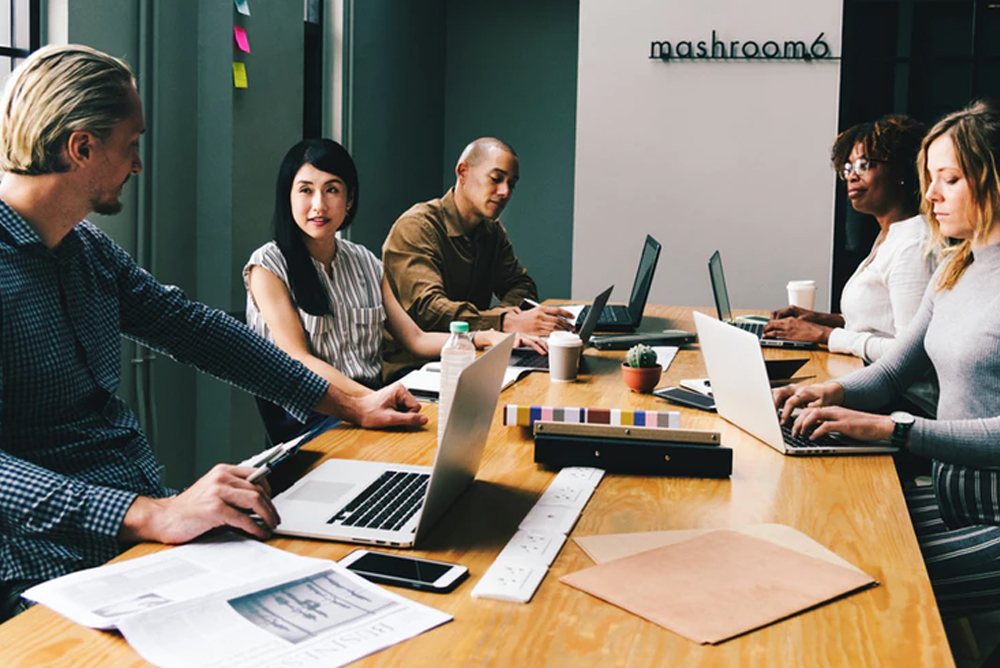

In [ ]:
image = cv2.imread("./office.jpg") # Change the image here
cv2_imshow(image)

Setup

In [ ]:
cfg = get_cfg()

#cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml")) #InstanceSegmentation/mask... can be exchange for Detection/faster...
#cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml") # 101_FPN can be exchanged for 50_FPN, 50_C4, 50_DC5, 101, 101_C4 ...

#cfg.merge_from_file(model_zoo.get_config_file("LVISv0.5-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_1x.yaml")) #The dataset can be changed too, in this line is used LVISv0.5 
#cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("LVISv0.5-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_1x.yaml")

cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")) 
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml") 


cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.6
#cfg.MODEL.DEVICE = "cuda" 

In [ ]:
predictor = DefaultPredictor(cfg)
outputs = predictor(image)

  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


Scanning the image

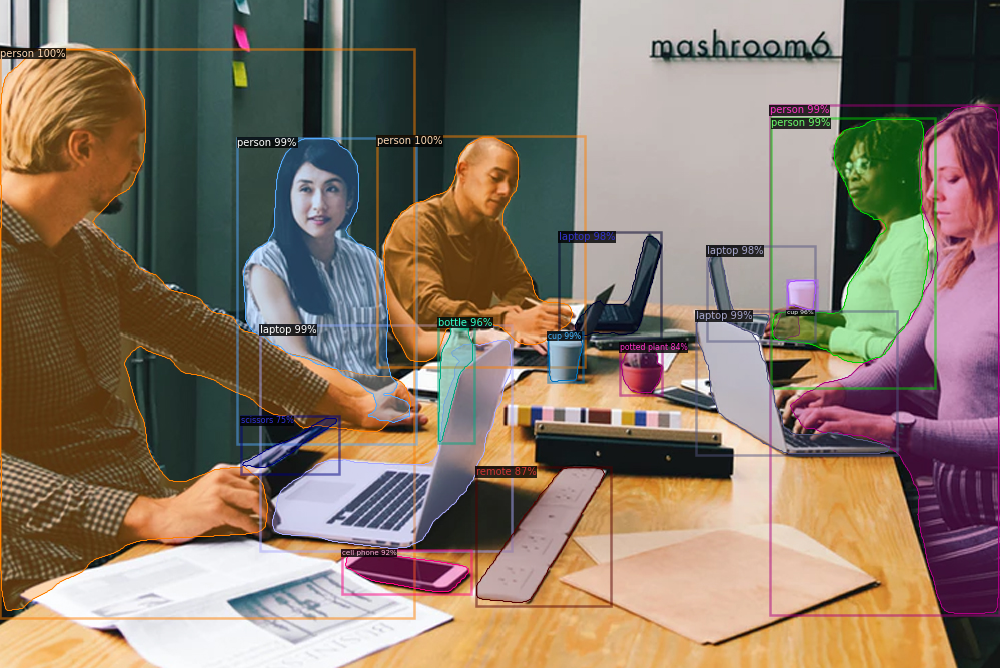

In [ ]:
viz = Visualizer(image[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]),
instance_mode = ColorMode.IMAGE_BW)
output = viz.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(output.get_image()[:,:,::-1])


Listing classes

In [ ]:
classes = predictor.metadata.thing_classes
print(classes)

# print(classes.index('cell phone'))

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


#Identified information

---------------------------------------------

In [ ]:
detections = predictor(image)
instances = detections["instances"].to("cpu")
instances = instances.pred_classes
quantity = len(instances)
identifiedArray = []

**With all the elements found**

In [ ]:
ELEMENT = 'person'    # Change here the element you want to search >>> It's important that the name is in the list of classes and is exactly the same <<<
identifiedArray = []

print(f"The image identified {quantity} object(s):\n" )

for identifiedThings in instances:
  print(" • "+classes[identifiedThings])

for identifiedThings in instances:
  identifiedArray.append(classes[identifiedThings])

if(ELEMENT in classes):
  if ELEMENT in identifiedArray:
    elementQuantity = identifiedArray.count(ELEMENT)
    print(f"\nThe element '{ELEMENT}' has {elementQuantity} ocurrence(s)")
  else:
    print(f"\nThe element {ELEMENT} had no ocurrence")
else:
  print(f"\nThe element {ELEMENT} wasn't defined on dataset")

The image identified 16 object(s):

 • person
 • person
 • laptop
 • person
 • laptop
 • cup
 • person
 • person
 • laptop
 • laptop
 • bottle
 • cup
 • cell phone
 • remote
 • potted plant
 • scissors

The element 'person' has 5 ocurrence(s)


**Without element preseted**

In [ ]:
#Without element preseted

print(f"The image identified {quantity} different things: " )
#print(detections)

for identifiedThings in instances:
  print(" → "+classes[identifiedThings])

The image identified 16 different things: 
 → person
 → person
 → laptop
 → person
 → laptop
 → cup
 → person
 → person
 → laptop
 → laptop
 → bottle
 → cup
 → cell phone
 → remote
 → potted plant
 → scissors


**Only with predefined elements**

In [ ]:
#Only elements preseteds
ELEMENT = 'person'
identifiedArray = []

for identifiedThings in instances:
  identifiedArray.append(classes[identifiedThings])

if ELEMENT in identifiedArray:
  quantidade = identifiedArray.count(ELEMENT)
  print(f"Your object was identified {quantidade} time(s)")
else:
  print("Your object wasn't identified")

#identifiedArray

Your object was identified 5 time(s)


# BODY MOVEMENT

---------------------



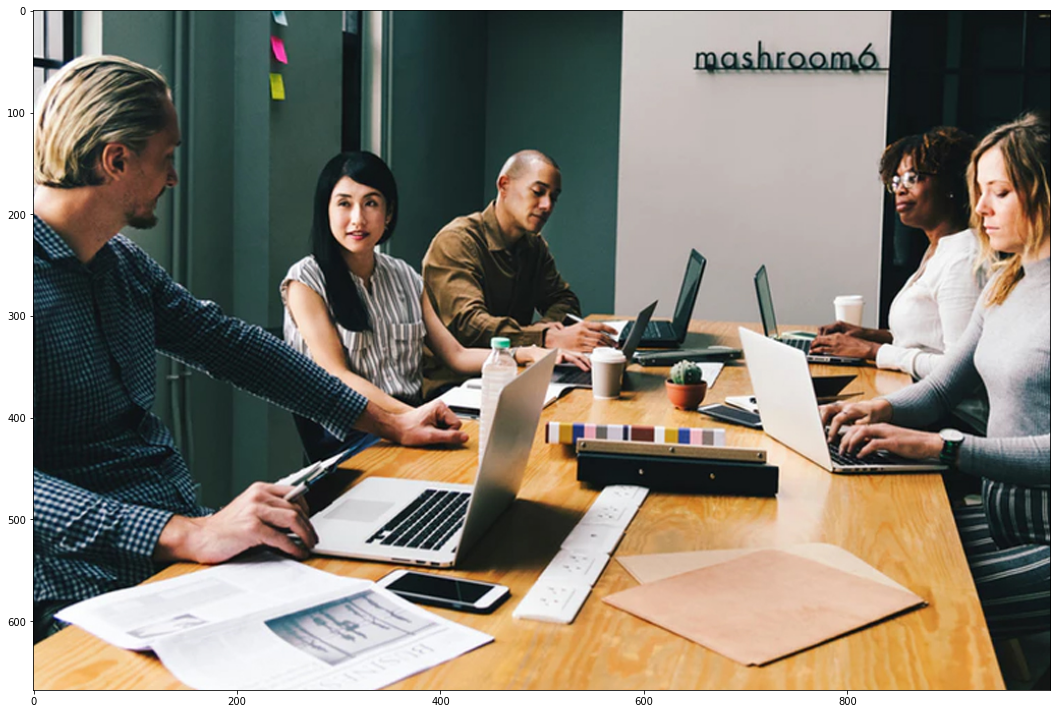

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,12.5))
plt.imshow(image[..., ::-1])

In [ ]:
cfg = get_cfg()   # get a fresh new config

cfg.MODEL.DEVICE = "cpu"

cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7 

  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


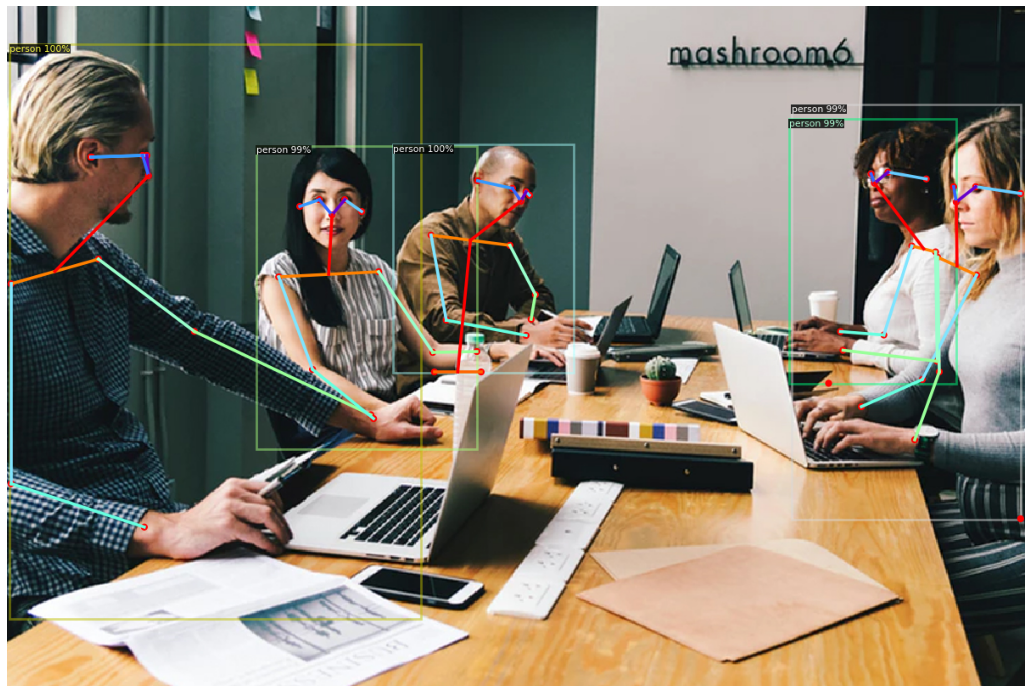

In [ ]:
def cv2_imshow(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(25,12.5)), plt.imshow(image), plt.axis('off');

predictor = DefaultPredictor(cfg)
outputs = predictor(image)

viz = Visualizer(image[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
output = viz.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(output.get_image()[:, :, ::-1])

# TESTING AREA

-----------------------------------------

  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


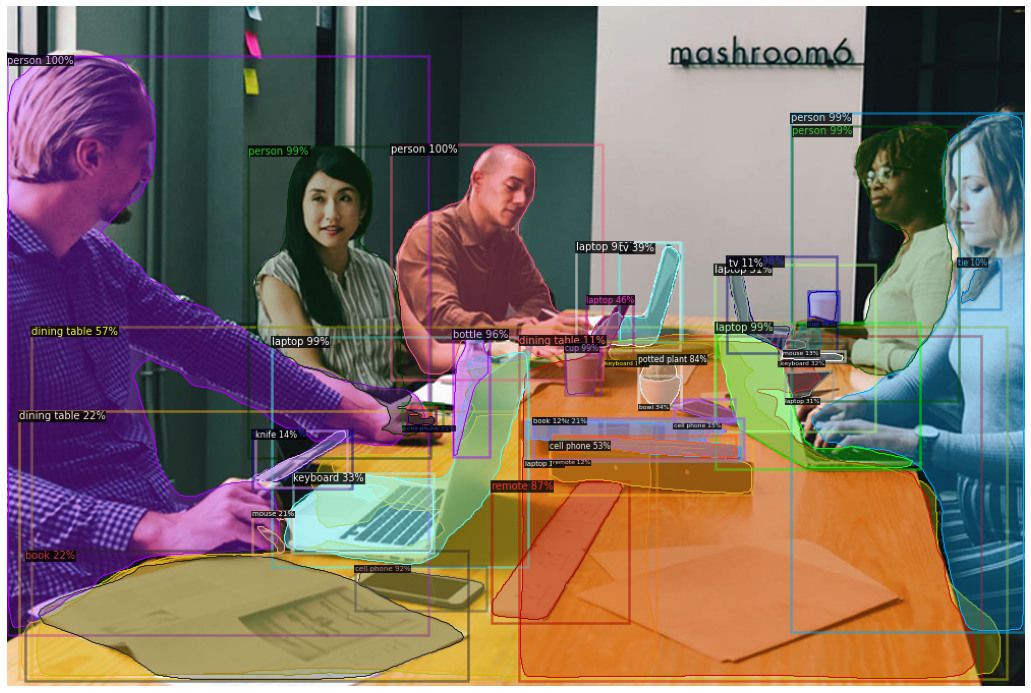

In [ ]:
cfg = get_cfg()

#cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml")) #InstanceSegmentation/mask... can be exchange for Detection/faster...
#cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml") # 101_FPN can be exchanged for 50_FPN, 50_C4, 50_DC5, 101, 101_C4 ...

#cfg.merge_from_file(model_zoo.get_config_file("LVISv0.5-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_1x.yaml")) #The dataset can be changed too, in this line is used LVISv0.5 
#cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("LVISv0.5-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_1x.yaml")

cfg.merge_from_file(model_zoo.get_config_file("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml")) 
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-PanopticSegmentation/panoptic_fpn_R_101_3x.yaml") 


cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.1

predictor = DefaultPredictor(cfg)
outputs = predictor(image)

viz = Visualizer(image[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]),
instance_mode = ColorMode.IMAGE_BW)
output = viz.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(output.get_image()[:,:,::-1])

In [ ]:
detections = predictor(image)
detections

{'sem_seg': tensor([[[ 2.4545,  2.4526,  2.4416,  ...,  1.7443,  1.7329,  1.7214],
          [ 2.4666,  2.4652,  2.4576,  ...,  1.7807,  1.7651,  1.7495],
          [ 2.5355,  2.5375,  2.5487,  ...,  1.9883,  1.9490,  1.9097],
          ...,
          [ 6.5554,  6.5771,  6.7006,  ...,  5.2794,  5.1497,  5.0200],
          [ 6.5534,  6.5698,  6.6635,  ...,  5.2429,  5.1298,  5.0166],
          [ 6.5530,  6.5685,  6.6570,  ...,  5.2365,  5.1263,  5.0161]],
 
         [[ 1.3649,  1.3710,  1.4059,  ...,  2.3193,  2.2925,  2.2658],
          [ 1.3678,  1.3739,  1.4085,  ...,  2.3183,  2.2937,  2.2690],
          [ 1.3842,  1.3901,  1.4236,  ...,  2.3128,  2.3002,  2.2877],
          ...,
          [ 0.5080,  0.5037,  0.4788,  ...,  0.2321,  0.2268,  0.2215],
          [ 0.5515,  0.5474,  0.5236,  ...,  0.2299,  0.2212,  0.2125],
          [ 0.5591,  0.5550,  0.5315,  ...,  0.2295,  0.2202,  0.2109]],
 
         [[-0.2125, -0.2176, -0.2467,  ..., -0.3519, -0.3298, -0.3076],
          [-0.212

# DEFINED

In [ ]:
#Positions
instances = detections["instances"].to("cpu")

instances = instances.pred_boxes
instances

Boxes(tensor([[  0.0000,  48.7927, 414.0663, 618.0891],
        [377.0311, 135.8190, 584.7797, 367.3378],
        [695.6548, 311.1999, 896.6903, 454.5046],
        [769.8304, 105.2170, 999.3799, 614.6437],
        [260.0526, 325.0751, 512.3578, 550.9720],
        [547.9913, 331.5895, 583.1760, 382.1534],
        [771.2310, 118.4212, 935.0455, 388.3296],
        [237.4710, 137.7084, 415.6856, 443.6972],
        [558.5403, 231.8824, 661.0038, 337.5597],
        [706.5105, 245.8931, 814.8475, 341.3904],
        [437.7821, 317.7405, 473.5229, 442.8358],
        [787.1886, 279.9922, 816.8135, 310.3526],
        [341.7934, 549.8232, 470.5844, 593.5956]]))

In [ ]:
#Tensor score
instances = detections["instances"].to("cpu")

instances = instances.scores
instances

tensor([0.9987, 0.9961, 0.9946, 0.9944, 0.9937, 0.9907, 0.9902, 0.9851, 0.9839,
        0.9806, 0.9626, 0.9589, 0.9167])

#Searching for the failure objects

In [ ]:
detections = predictor(image)
instances = detections["panoptic_seg"]

instances[1]

[{'id': 1,
  'isthing': True,
  'score': 0.9987469911575317,
  'category_id': 0,
  'instance_id': 0},
 {'id': 2,
  'isthing': True,
  'score': 0.9961214661598206,
  'category_id': 0,
  'instance_id': 1},
 {'id': 3,
  'isthing': True,
  'score': 0.9945704340934753,
  'category_id': 63,
  'instance_id': 2},
 {'id': 4,
  'isthing': True,
  'score': 0.9943879246711731,
  'category_id': 0,
  'instance_id': 3},
 {'id': 5,
  'isthing': True,
  'score': 0.9937278032302856,
  'category_id': 63,
  'instance_id': 4},
 {'id': 6,
  'isthing': True,
  'score': 0.9907335042953491,
  'category_id': 41,
  'instance_id': 5},
 {'id': 7,
  'isthing': True,
  'score': 0.9901654124259949,
  'category_id': 0,
  'instance_id': 6},
 {'id': 8,
  'isthing': True,
  'score': 0.9850645661354065,
  'category_id': 0,
  'instance_id': 7},
 {'id': 9,
  'isthing': True,
  'score': 0.9838712215423584,
  'category_id': 63,
  'instance_id': 8},
 {'id': 10,
  'isthing': True,
  'score': 0.9806228876113892,
  'category_id':

In [ ]:
#Searching for the failure objects
instances = detections["instances"].to("cpu")

instances = instances.pred_classes
print(classes[36])

skateboard
